# Capítulo 2 - Introdução ao Python

Vamos começar revisando alguns comandos bem básicos só para nos acostumarmos com algumas coisas relativas ao ambiente.

## Comandos básicos

In [1]:
print("Ajuste um modelo com", 11, "variaveis")

Ajuste um modelo com 11 variaveis


Com o comando abaixo, podemos obter mais informações sobre como utilizar funções em python, obtendo uma descrição delas:

In [2]:
print?

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method

## Numpy

O numpy é a principal biblioteca em python de para manipulação de entidades matemáticas e cálculos. Vamos ver algumas de suas funcionalidades agora.

In [11]:
import numpy as np

### Arrays

In [10]:
x = np.array([3, 4, 5])
y = np.array([4, 9, 7])

No bloco acima, definimos tanto x quanto y como vetores do numpy, o que significa que agora se somarmos eles, vamos obter uma soma dos dois vetores:

In [12]:
x+y

array([ 7, 13, 12])

Da mesma forma, podemos definir matrizes como vetores bi-dimensionais utilizando a função array do numpy:

In [14]:
x = np.array([[1,2], [3,4]])
x

array([[1, 2],
       [3, 4]])

Existem diversos atributos associados a um array do numpy, que podem ser acessados através de algo como "x.atributo", um exemplo é o número de dimensões do array que pode ser acessado como x.ndim

In [16]:
x.ndim

2

O resultado 2 acima mostra como x neste caso, da matriz, é um vetor bidimensional.

O tipo da dos valores que compõem x também pode ser acessado:

In [18]:
x.dtype

dtype('int64')

In [19]:
np.array([[1, 2], [3.0, 4]]).dtype

dtype('float64')

É possível manipular o formato de dados que utilizamos para criar um array, forçando um tipo float por exemplo. Diferentes tipos de valores vão ocupar diferentes espaços em memória, o que pode ser muito valioso em alguns casos, poupar memória utilzando tipos mais econômicos como int ou float8

In [20]:
np.array([[1, 2], [3.0, 4]], float).dtype

dtype('float64')

Outra função útil de arrays é o método shape que retorno as dimensões daquele array:

In [22]:
np.array([[1, 2], [3, 4]], float).shape

(2, 2)

Os tipos de variáveis, como o array, tipicamente possuem métodos implementados. Os métodos são funções que se aplicam especificamente a aquele objeto. No caso de arrays, um exemplo é o método sum que soma todos os elementos daquele objeto:

In [21]:
x = np.array([1, 2, 3, 4])
x.sum()

np.int64(10)

Outro método bastante útil é o reshape, que altera o formato de x para um outro formato desejado:

In [23]:
x = np.array([1, 2, 3, 4, 5, 6])
print("x inicial:\n", x)
x_reshape = x.reshape((2,3))
print("x re-formatado:\n", x_reshape)

x inicial:
 [1 2 3 4 5 6]
x re-formatado:
 [[1 2 3]
 [4 5 6]]


Os arrays em numpy são indexados de 0 a n-1 conforme o tamanho de cada dimensão, ou seja, a primeira linha e coluna de x_reshape pode ser obtida assim:

In [24]:
x_reshape[0,0]

np.int64(1)

In [25]:
x_reshape[1,2] # aqui retornamos a segunda linha e terceira coluna

np.int64(6)

Agora vamo ver o que acontece quando modificamos o x_reshape:

In [26]:
print('x antes de modificarmos x_reshape:\n', x) 
print('x_reshape antes de modificarmos x_reshape:\n', x_reshape) 
x_reshape[0, 0] = 5
print('x_reshape depois de modificarmos o primeiro elemento:\n',
x_reshape)
print('x depois de modificarmos o primeiro elemento de x_reshape:\n', x)

x antes de modificarmos x_reshape:
 [1 2 3 4 5 6]
x_reshape antes de modificarmos x_reshape:
 [[1 2 3]
 [4 5 6]]
x_reshape depois de modificarmos o primeiro elemento:
 [[5 2 3]
 [4 5 6]]
x depois de modificarmos o primeiro elemento de x_reshape:
 [5 2 3 4 5 6]


Veja que x e x_reshape apontam para as mesmas alocações de memória. O que significa que ao modificarmos x_reshape, também estamos modificando os valores disponíveis em x, o que deve ser levado em consideração em nossos códigos.

Os três atributos de arrays que mais utilizaremos ao longo deste livro são os três abaixo. shape nos dá as dimensões de nosso array, n dimi o número de dimensões distintas e T transpõe as linhas e colunas das matrizes:

In [27]:
x_reshape.shape, x_reshape.ndim, x_reshape.T

((2, 3),
 2,
 array([[5, 4],
        [2, 5],
        [3, 6]]))

Também podemos realizar operações sobre arrays que vão ser aplicadas sobre cada membro do array por exemplo:

In [28]:
print(np.sqrt(x))
print(x**2)
print(x**0.5)

[2.23606798 1.41421356 1.73205081 2.         2.23606798 2.44948974]
[25  4  9 16 25 36]
[2.23606798 1.41421356 1.73205081 2.         2.23606798 2.44948974]


### Número aleatórios

Ao longo deste livro, em diversas situações vamos gerar amostras de variáveis aleatórias. A seguinte função vai ser útil nestas situações:

In [29]:
np.random.normal?

Signature: np.random.normal(loc=0.0, scale=1.0, size=None)
Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the `~numpy.random.Generator.normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width")

Os argumentos desta função são loc, scale e size pois ela retorna um array de tamanho size com média loc e desvio padrão scale, por exemplo:

In [31]:
x = np.random.normal(size=50)
x

array([-0.37699013,  1.54472614,  0.77438706,  1.74123397, -0.38118559,
       -1.04605828, -0.06801816,  1.65888768,  0.62312446, -0.88951435,
       -1.15440951, -0.93054153,  0.34822767, -1.1238968 , -0.96596319,
       -2.12410561,  0.06133268, -0.0544642 ,  0.725464  , -0.69050222,
        0.49603489, -0.00729694, -0.79902994, -0.16935846,  0.99655089,
        1.98721216,  0.85642779, -0.47470049, -0.4235224 , -0.70723633,
        0.01557887, -1.70678714, -1.06209866,  0.81670809,  0.270136  ,
       -0.44596799, -0.57887252,  1.18266718, -0.07274015,  0.49819919,
        1.07938672, -1.17679666, -2.02957808, -0.19453174,  0.03300637,
       -0.37667289,  0.82605867, -0.18268131,  0.36208436, -1.59158845])

Podemos criar uma segunda variável y que soma um valor tirado de uma distribuição N(50, 1) a cada valor de x e utilizar a função corrcoef para obter a matriz de correlação entre x e y:

In [32]:
y = x + np.random.normal(loc=50, scale=1, size=50)

In [33]:
np.corrcoef(x, y)

array([[1.       , 0.7318427],
       [0.7318427, 1.       ]])

Outra forma de fazermos a mesma coisa é uitilizando a classe default_rng do numpy para criar um objeto capaz de reproduzir a aleatoriedade baseada em um número chamado de seed. Veja que no código abaixo os valores são reproduzidos duas vezes pois definimos o mesmo seed tanto para rng como para rng2:

In [42]:
rng = np.random.default_rng(42)
print(rng.normal(scale=5, size=2))
rng2 = np.random.default_rng(42)
print(rng2.normal(scale=5, size=2))

[ 1.5235854  -5.19992053]
[ 1.5235854  -5.19992053]


As seguintes funções são úteis quando temos arrays geradas aleatoriamente para calcular certas propriedades:

np.var -> Calcula a variância

np.mean -> Calcula a média

np.std -> Calcula o desvio padrão

In [44]:
print("media:", np.mean(y))
print("variancia:", np.var(y))
print("desvio padrao:", np.std(y))

media: 49.72620740275749
variancia: 2.089439271634536
desvio padrao: 1.445489284510451


Estas mesmas funções podem ser utilizadas em matrizes:

In [45]:
X = rng.standard_normal((10, 3)) 
X

array([[ 0.7504512 ,  0.94056472, -1.95103519],
       [-1.30217951,  0.1278404 , -0.31624259],
       [-0.01680116, -0.85304393,  0.87939797],
       [ 0.77779194,  0.0660307 ,  1.12724121],
       [ 0.46750934, -0.85929246,  0.36875078],
       [-0.9588826 ,  0.8784503 , -0.04992591],
       [-0.18486236, -0.68092954,  1.22254134],
       [-0.15452948, -0.42832782, -0.35213355],
       [ 0.53230919,  0.36544406,  0.41273261],
       [ 0.430821  ,  2.1416476 , -0.40641502]])

In [46]:
np.mean(X, axis=0) # média das colunas

array([0.03416276, 0.1698384 , 0.09349117])

In [48]:
np.mean(X, axis=1) #média das linhas

array([-0.08667309, -0.49686057,  0.0031843 ,  0.65702128, -0.00767745,
       -0.04345274,  0.11891648, -0.31166362,  0.43682862,  0.72201786])

In [49]:
np.var(X, axis=0)

array([0.45174542, 0.82219904, 0.79557517])

In [50]:
np.std(X, axis=0)

array([0.67212009, 0.90675192, 0.89195021])

### Gráficos

Agora, vamos olhar um pouco para ferramentas de visualização de dados em python. Vamos utilizar principalmente o pacote matplotlib, importado abaixo. Dentro deste pacote, temos o conceito de plot. Um plot é uma figura que pode conter um ou mais gráficos dentro dela com diferentes eixos.

In [53]:
from matplotlib.pyplot import subplots

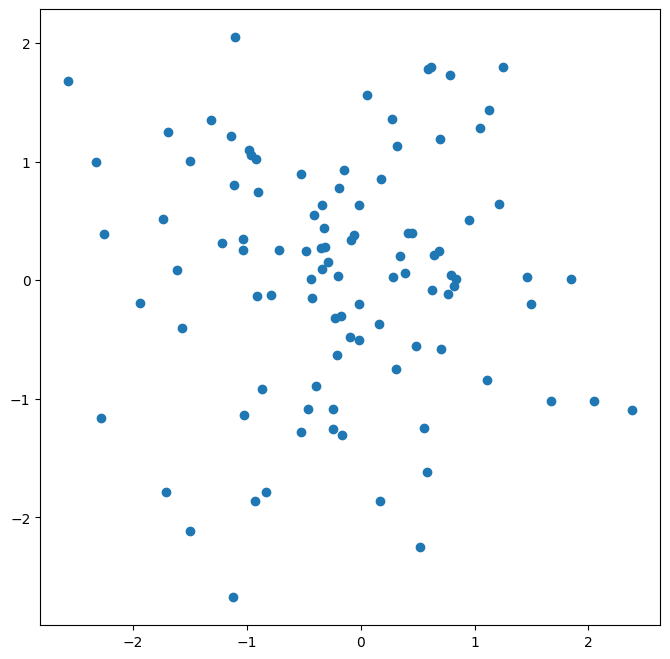

In [57]:
fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100) 
y = rng.standard_normal(100) 
ax.plot(x, y, 'o');

Enquanto o código acima cria um plot de dispersão entre as variáveis x e y, é possível atingir o mesmo resultado utilizando a seguinte função:

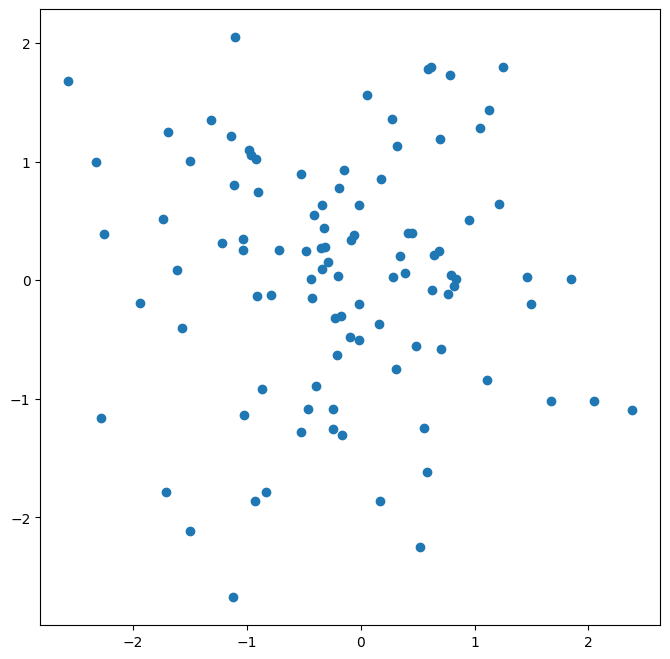

In [58]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o');

Nós podemos ainda acrescentar ao nosso gráfico algumas informações importantes como título e título dos eixos:

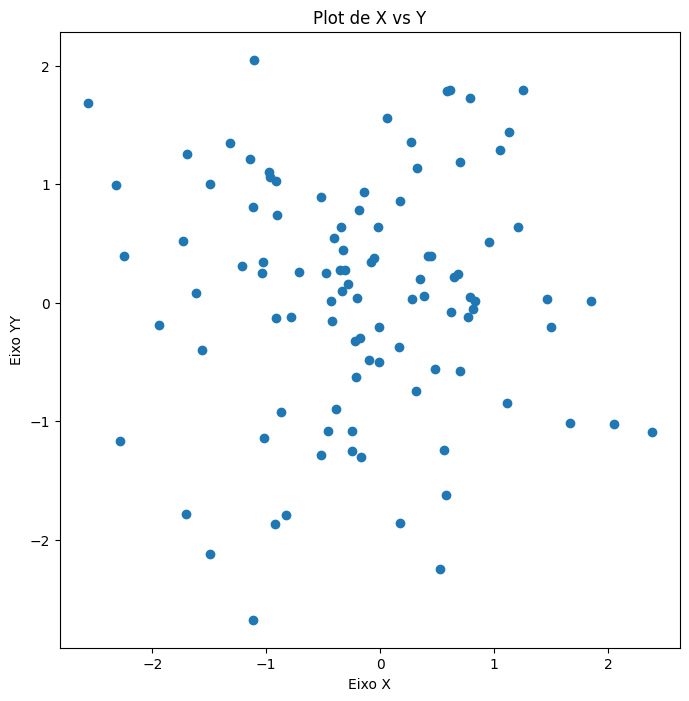

In [59]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o')
ax.set_xlabel("Eixo X")
ax.set_ylabel("Eixo YY")
ax.set_title("Plot de X vs Y");

Podemos ainda alterar as dimensões da figura para facilitar a visualização:

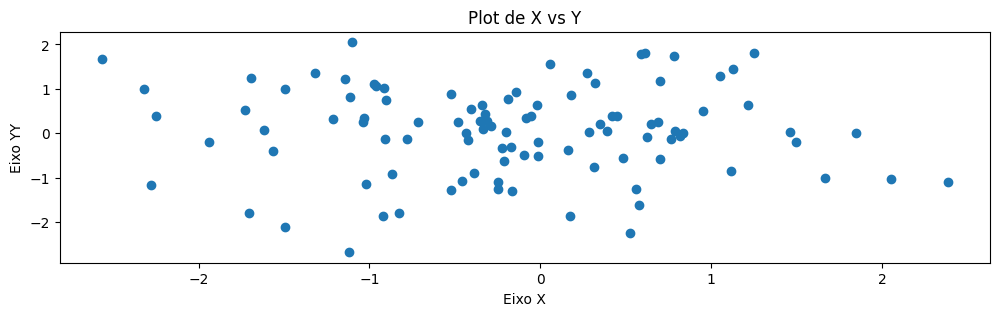

In [60]:
fig.set_size_inches(12,3)
fig

Também é possível gerar diversos subplots dentro da mesma figura, trazendo diferentes informações:

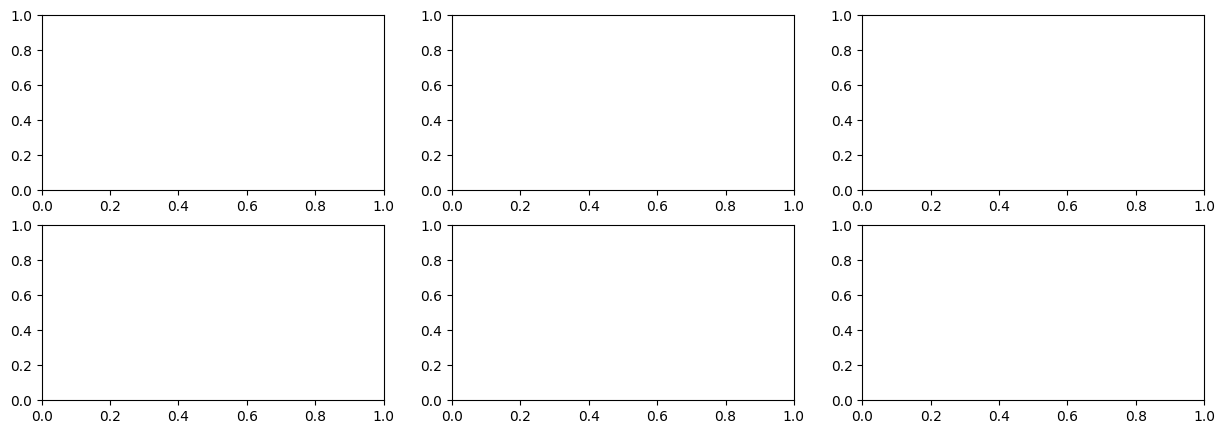

In [61]:
fig, axes = subplots(nrows=2,
ncols=3,
figsize=(15, 5))

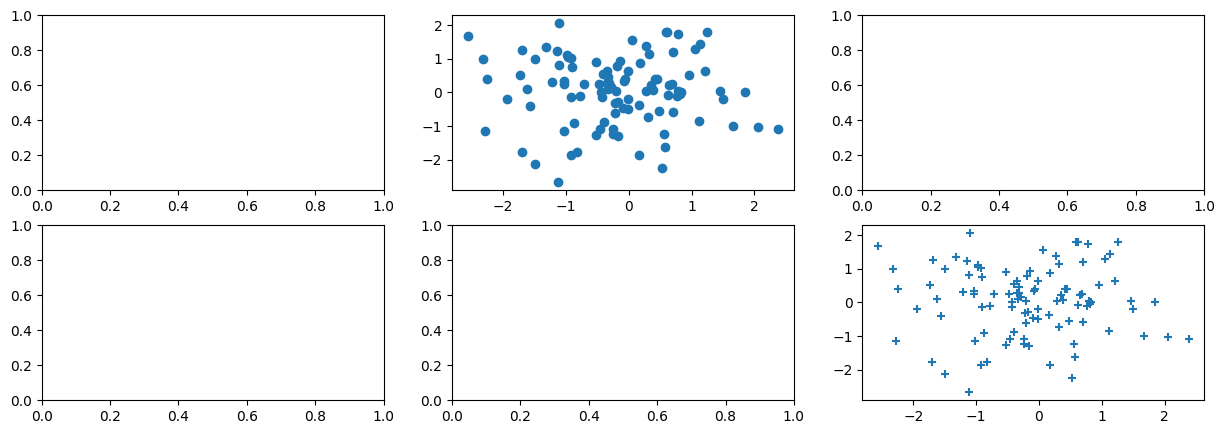

In [62]:
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')
fig

Agora, vamos criar gráficos um pouco mais sofisticados. A função ax.contour cria curvas de nível baseados em valores de 3 variáveis: X, Y e f. Vamos criar as curvas de nível para uma função qualquer:

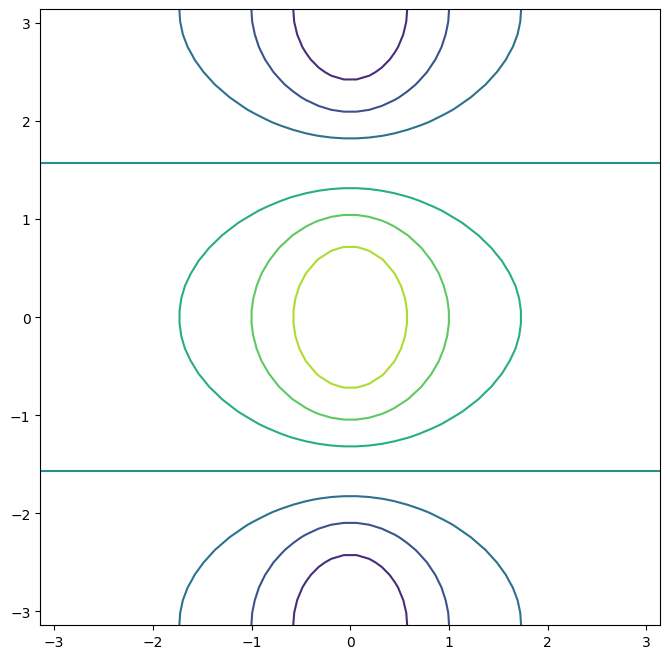

In [63]:
fig, ax = subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50) #gera 50 valores entre -pi e pi
y = x 
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2)) 
ax.contour(x, y, f);

Podemos ainda aumentar a quantidade de curvas de nível utilizando o parâmetro levels de contour:

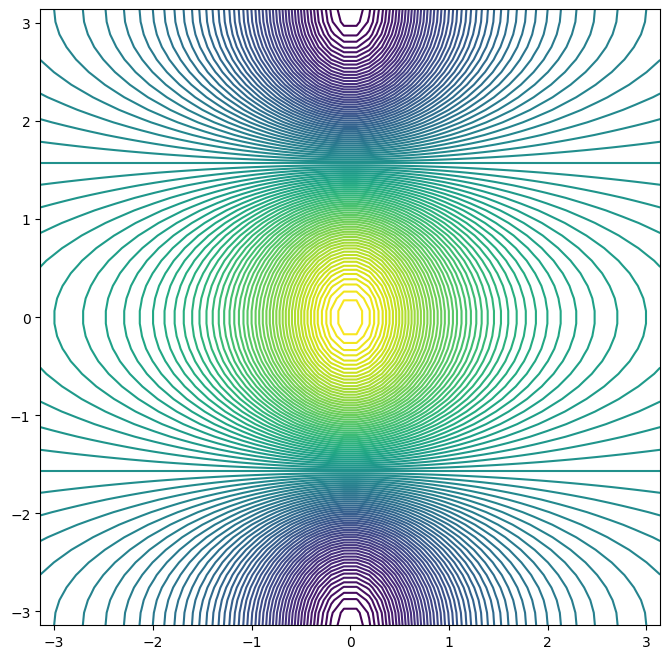

In [67]:
fig, ax = subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50) #gera 50 valores entre -pi e pi
y = x 
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2)) 
ax.contour(x, y, f, levels=100);

A função imshow mostra os mesmos dados de f como um mapa de calor:

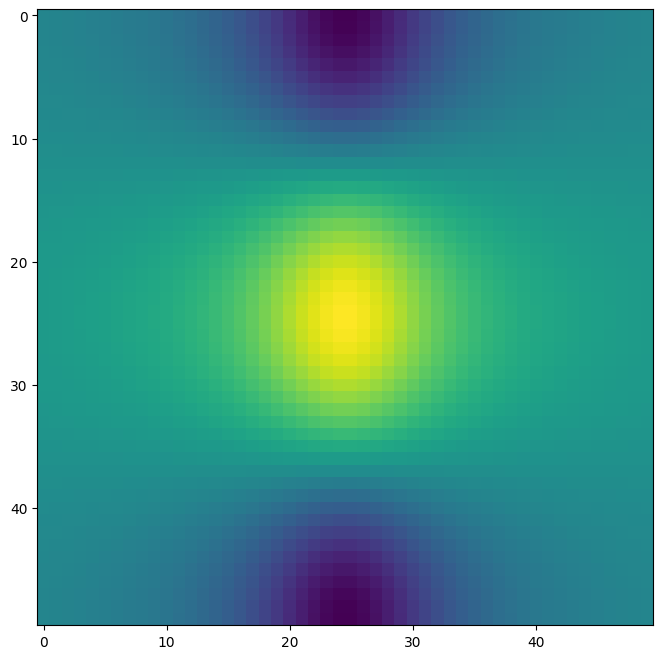

In [68]:
fig, ax = subplots(figsize=(8, 8))
ax.imshow(f);


### Sequências

Como vimos, o métodos linspace é cara de criar uma sequência de valores entre dois números em intervalos regulares:

In [69]:
seq1 = np.linspace(0, 10, 11)
seq1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Outra alternativa é o arange, em que em vez de escolhermos o número de elementos, nós escolhemos o intervalo entre cada elemento:

In [70]:
seq2 = np.arange(0, 10, 2)
seq2

array([0, 2, 4, 6, 8])

Note que neste caso, o 10, limite final do range, não é inclusivo na lista.

### Indexando dados